# 미니 프로젝트 - 2015년 범죄 발생 지역별 통계
>공공데이터포털 : [https://www.data.go.kr/data/3074462/fileData.do#/tab-layer-openapi]                                               
경찰청 : [https://www.police.go.kr/www/open/publice/publice03_2015.jsp](https://www.police.go.kr/www/open/publice/publice03_2015.jsp)

In [1]:
#필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#데이터 불러오기
data = pd.read_csv('경찰청_범죄 발생 지역별 통계_20151231.csv', encoding = 'cp949')
data
# print(type(data))

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,살인기수,67,20,13,17,11,8,12,2,8,...,1,0,2,4,7,2,0,11,7,30
1,살인미수등,96,41,23,34,7,16,11,1,9,...,5,5,6,0,13,2,1,16,4,44
2,강도,274,161,60,103,44,64,29,0,14,...,1,4,2,13,26,3,4,29,4,65
3,강간,969,383,216,304,216,181,132,3,73,...,10,12,35,63,85,11,14,64,18,328
4,유사강간,118,24,21,35,17,14,10,1,9,...,1,1,3,1,8,1,1,12,0,33
5,강제추행,4282,991,645,924,495,362,293,34,256,...,20,22,59,58,172,36,32,165,28,764
6,기타강간강제추행등,94,37,20,31,22,12,9,0,7,...,1,2,1,4,13,3,1,11,2,55
7,방화,315,117,86,94,48,41,36,5,40,...,2,7,9,12,33,0,12,23,4,148
8,절도,55280,20136,12759,10679,8438,9495,5449,638,3287,...,313,358,1205,2032,5860,602,921,3309,643,11754
9,상해,7174,4675,2736,2179,1162,1516,1353,117,490,...,134,194,307,408,1187,321,269,532,149,3941


# 전처리

In [3]:
#범죄명과 지역의 위치를 바꾸기 위해 전치
ci = data.T
ci

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
범죄중분류,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타강간강제추행등,방화,절도,상해,...,특별경제범죄,마약범죄,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄
서울,67,96,274,969,118,4282,94,315,55280,7174,...,22075,1360,3941,53,74958,215,38,24,4591,41752
부산,20,41,161,383,24,991,37,117,20136,4675,...,13868,759,1832,198,35841,190,4,24,959,19868
대구,13,23,60,216,21,645,20,86,12759,2736,...,3421,393,417,19,39725,31,4,18,800,9766
인천,17,34,103,304,35,924,31,94,10679,2179,...,5751,557,654,69,31163,28,20,19,1200,13677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경남 통영,2,2,3,11,1,36,3,0,602,321,...,111,10,19,21,2936,43,0,4,52,1594
제주 서귀포,0,1,4,14,1,32,1,12,921,269,...,269,6,37,24,3581,3,0,12,52,1331
제주 제주,11,16,29,64,12,165,11,23,3309,532,...,982,20,131,22,10857,6,0,11,190,3130
기타도시,7,4,4,18,0,28,2,4,643,149,...,1631,16,36,30,2325,1,1,3,155,1341


In [4]:
#전치한 테이블에서 범죄 중분류 제거
ci1 = ci.drop(['범죄중분류'])

In [5]:
#컬럼명 지정하고 문자형에서 숫자형으로 형 변환
ci1.columns = ['살인기수','살인미수','강도','강간','유사강간','강제추행','기타강간','방화','절도','상해','폭행','체포감금','협박','약취유인','폭력행위','공갈','손괴','직무유기','직권남용','증수뢰','통화','문서인장','유가증권인지','사기','횡령','배임','성풍속범죄','도박범죄','특별경제범죄','마약범죄','보건범죄','환경범죄','교통범죄','노동범죄','안보범죄','선거범죄','병역범죄','기타범죄']
ci2 = ci1.astype(int)

In [6]:
#테이블 정보 확인
ci2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 서울 to 도시이외
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인기수    88 non-null     int32
 1   살인미수    88 non-null     int32
 2   강도      88 non-null     int32
 3   강간      88 non-null     int32
 4   유사강간    88 non-null     int32
 5   강제추행    88 non-null     int32
 6   기타강간    88 non-null     int32
 7   방화      88 non-null     int32
 8   절도      88 non-null     int32
 9   상해      88 non-null     int32
 10  폭행      88 non-null     int32
 11  체포감금    88 non-null     int32
 12  협박      88 non-null     int32
 13  약취유인    88 non-null     int32
 14  폭력행위    88 non-null     int32
 15  공갈      88 non-null     int32
 16  손괴      88 non-null     int32
 17  직무유기    88 non-null     int32
 18  직권남용    88 non-null     int32
 19  증수뢰     88 non-null     int32
 20  통화      88 non-null     int32
 21  문서인장    88 non-null     int32
 22  유가증권인지  88 non-null     int32
 23  사기      88 non-null

In [7]:
#인덱스를 초기화하고 특정 컬럼 이름 변경
criminal = ci2.reset_index()
criminal = criminal.rename(columns={'index' : '지역'})

In [8]:
#테이블 정보 확인
criminal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      88 non-null     object
 1   살인기수    88 non-null     int32 
 2   살인미수    88 non-null     int32 
 3   강도      88 non-null     int32 
 4   강간      88 non-null     int32 
 5   유사강간    88 non-null     int32 
 6   강제추행    88 non-null     int32 
 7   기타강간    88 non-null     int32 
 8   방화      88 non-null     int32 
 9   절도      88 non-null     int32 
 10  상해      88 non-null     int32 
 11  폭행      88 non-null     int32 
 12  체포감금    88 non-null     int32 
 13  협박      88 non-null     int32 
 14  약취유인    88 non-null     int32 
 15  폭력행위    88 non-null     int32 
 16  공갈      88 non-null     int32 
 17  손괴      88 non-null     int32 
 18  직무유기    88 non-null     int32 
 19  직권남용    88 non-null     int32 
 20  증수뢰     88 non-null     int32 
 21  통화      88 non-null     int32 
 22  문서인장    88 non-null     int3

In [9]:
#새로운 변수 생성하여 새로운 데이터프레임에 합치기
st = pd.DataFrame(criminal['살인기수'] + criminal['살인미수']+ criminal['강도']+criminal['강간']+criminal['유사강간']+criminal['강제추행']+criminal['기타강간']+criminal['방화'], columns = ['강력범죄'])
crim1 = pd.concat([criminal, st], axis = 1)

fi = pd.DataFrame(crim1['상해'] + crim1['폭행']+ crim1['체포감금']+crim1['협박']+crim1['약취유인']+crim1['폭력행위']+crim1['공갈']+crim1['손괴'], columns = ['폭력범죄'])
crim2 = pd.concat([crim1, fi], axis = 1)

inte = pd.DataFrame(crim2['직무유기'] + crim2['직권남용']+ crim2['증수뢰']+crim2['통화']+crim2['문서인장']+crim2['폭력행위']+crim2['유가증권인지']+crim2['사기']+crim2['횡령']+crim2['배임'], columns = ['지능범죄'])
crim3 = pd.concat([crim2, inte], axis = 1)

mo = pd.DataFrame(crim3['성풍속범죄'] + crim3['도박범죄'], columns = ['풍속범죄'])
crime = pd.concat([crim3, mo], axis = 1)

In [10]:
#최종 분석에 사용할 데이터 프레임 출력
crime

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741
1,부산,20,41,161,383,24,991,37,117,20136,...,35841,190,4,24,959,19868,1774,20928,27696,2085
2,대구,13,23,60,216,21,645,20,86,12759,...,39725,31,4,18,800,9766,1084,14708,15790,1418
3,인천,17,34,103,304,35,924,31,94,10679,...,31163,28,20,19,1200,13677,1542,18054,18926,1580
4,광주,11,7,44,216,17,495,22,48,8438,...,23412,13,3,9,371,5301,860,9602,10541,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,경남 통영,2,2,3,11,1,36,3,0,602,...,2936,43,0,4,52,1594,58,1006,842,101
84,제주 서귀포,0,1,4,14,1,32,1,12,921,...,3581,3,0,12,52,1331,65,1382,1133,65
85,제주 제주,11,16,29,64,12,165,11,23,3309,...,10857,6,0,11,190,3130,331,4136,3786,342
86,기타도시,7,4,4,18,0,28,2,4,643,...,2325,1,1,3,155,1341,67,825,2590,119


# 시각화

In [11]:
#강력 범죄가 가장 많이 발생하는 지역
crime[crime['강력범죄'] == crime['강력범죄'].max()]

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741


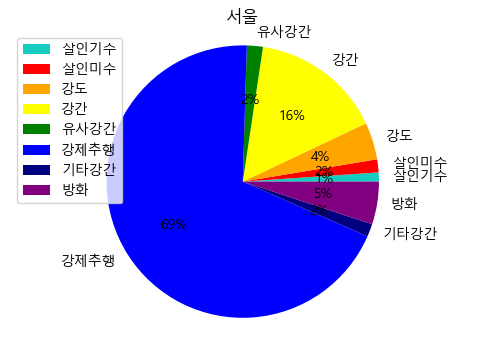

In [12]:
#강력 범죄가 가장 많이 발생하는 지역에서 가장 많이 발생하는 범죄명
sample_crime = crime.iloc[0]

label = ['살인기수','살인미수','강도','강간','유사강간','강제추행','기타강간','방화']
c = ['#14CCC0', 'red','orange','yellow','green','blue','navy','purple']

plt.rc('font', family='Malgun Gothic') 
plt.figure(dpi = 100)
plt.title(sample_crime[0])
plt.pie(sample_crime[1:9], labels = label, colors = c, autopct = '%1.f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [13]:
#지능 범죄가 가장 많이 발생하는 지역
crime[crime['지능범죄'] == crime['지능범죄'].max()]

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741


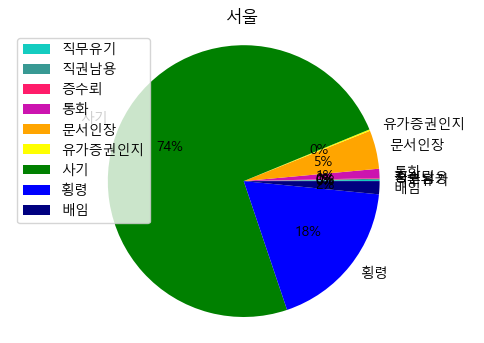

In [14]:
#지능 범죄가 가장 많이 발생하는 지역에서 가장 많이 발생하는 범죄명
sample_crime = crime.iloc[0]

label = ['직무유기','직권남용','증수뢰','통화','문서인장','유가증권인지','사기','횡령','배임']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF','orange','yellow','green','blue','navy']

plt.rc('font', family='Malgun Gothic') 
plt.figure(dpi = 100)
plt.title(sample_crime[0])
plt.pie(sample_crime[18:27], labels = label, colors = c, autopct = '%1.f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [15]:
#환경범죄가 가장 많이 발생하는 지역과 가장 적게 발생하는 지역의 이름과 건수
i=np.argmax(crime['환경범죄'])
j=np.argmin(crime['환경범죄'])
region1 = crime.iloc[i]['지역']
cnt1 = crime.iloc[i]['환경범죄']
region2 = crime.iloc[j]['지역']
cnt2 = crime.iloc[j]['환경범죄']
print('환경범죄가 가장 많이 발생하는 지역명은 '+region1+' ',cnt1,'건이고,')
print('환경범죄가 가장 적게 발생하는 지역명은 '+region2+ ' ',cnt2,'건입니다.')

환경범죄가 가장 많이 발생하는 지역명은 도시이외  503 건이고,
환경범죄가 가장 적게 발생하는 지역명은 경기 군포  0 건입니다.


In [16]:
#지역명에 경북이 들어간 지역 추출
city = crime.loc[crime['지역'].str.contains ('경북')]
city

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
65,경북 경산,1,2,14,23,2,54,1,5,1174,...,2464,6,1,4,82,802,102,1386,1404,99
66,경북 경주,3,4,9,30,2,55,3,6,1297,...,4839,3,0,9,76,1239,112,1334,1584,103
67,경북 구미,3,2,13,50,6,81,4,10,2212,...,8505,13,0,9,214,1307,169,2191,3498,134
68,경북 김천,0,1,3,14,1,25,2,4,506,...,2121,6,0,11,37,464,50,756,776,43
69,경북 문경,1,0,1,5,2,12,1,2,227,...,1005,0,0,3,5,190,24,417,330,15
70,경북 상주,1,0,1,9,1,13,1,2,322,...,1160,1,0,17,32,229,28,384,409,16
71,경북 안동,2,0,0,25,2,36,4,8,679,...,1750,6,0,2,38,532,77,1031,1110,37
72,경북 영주,1,0,9,9,1,23,4,6,245,...,1644,3,0,0,14,242,53,521,494,27
73,경북 영천,0,2,5,9,0,14,0,3,298,...,1346,0,0,3,31,268,33,457,588,23
74,경북 포항,1,7,10,48,4,90,8,16,2496,...,7475,15,0,5,243,2130,184,2840,2922,255


In [17]:
#경북 지역에서 마약범죄가 가장 많이 발생하는 지역과 마약범죄가 가장 적게 발생하는 지역 출력
n = np.argmax(city['마약범죄'])
m = np.argmin(city['마약범죄'])
reg1 = city.iloc[n]['지역']
count1 = city.iloc[n]['마약범죄']
reg2 = city.iloc[m]['지역']
count2 = city.iloc[m]['마약범죄']
print('마약범죄가 가장 많이 발생하는 지역명은 '+reg1+' ',count1,'건이고,')
print('마약범죄가 가장 적게 발생하는 지역명은 '+reg2+ ' ',count2,'건입니다.')

마약범죄가 가장 많이 발생하는 지역명은 경북 구미  44 건이고,
마약범죄가 가장 적게 발생하는 지역명은 경북 경산  11 건입니다.


In [18]:
#노동범죄 건수가 20이상이거나 선거범죄 건수가 10 이상인 상위 3지역 출력
a = crime.loc[(crime['노동범죄'] >= 20) | (crime['선거범죄'] >= 10)].head(3)
a

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741
1,부산,20,41,161,383,24,991,37,117,20136,...,35841,190,4,24,959,19868,1774,20928,27696,2085
2,대구,13,23,60,216,21,645,20,86,12759,...,39725,31,4,18,800,9766,1084,14708,15790,1418


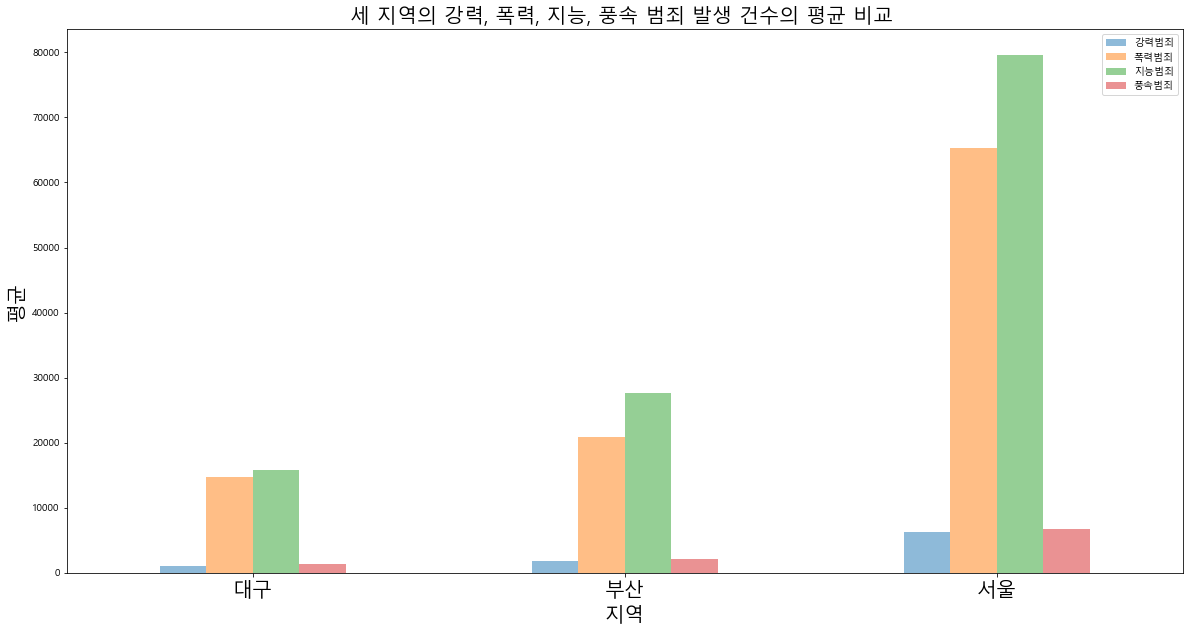

In [19]:
#세 지역의 강력, 폭력, 지능, 풍속범죄 발생 건수의 평균 비교
a_1 = a.groupby('지역')[['강력범죄','폭력범죄','지능범죄','풍속범죄']].mean()
a_2 = a_1.reset_index()

a_2.plot.bar(x='지역',alpha=0.5,figsize=(20,10))
plt.title('세 지역의 강력, 폭력, 지능, 풍속 범죄 발생 건수의 평균 비교 ', fontsize=20)
plt.xlabel('지역',fontsize=20)
plt.ylabel('평균',fontsize=20)

plt.xticks(fontsize=20,rotation=0)
plt.show()

In [20]:
#강원 지역만 추출하여 저장
gw = crime[crime['지역'].str.contains ('강원')]

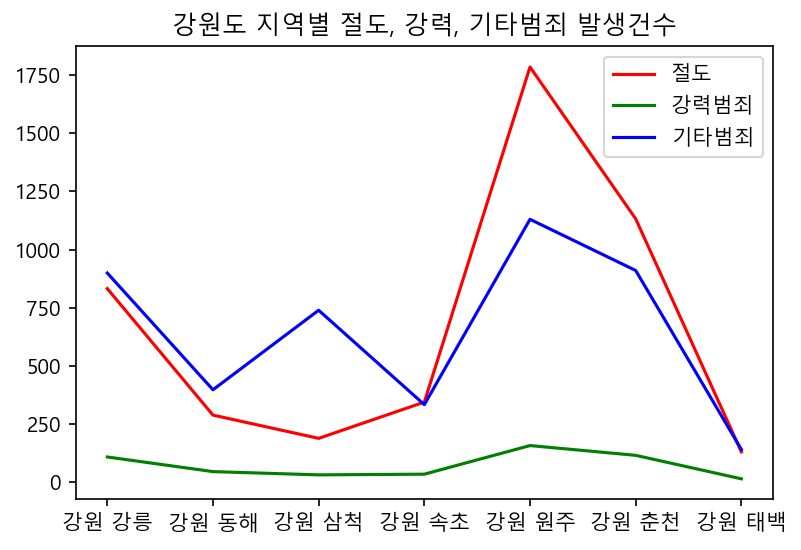

In [21]:
#강원도 지역별 절도, 강력, 기타범죄 발생 건수 시각화
plt.rc('font', family='Malgun Gothic')

plt.figure(dpi = 150)
plt.title('강원도 지역별 절도, 강력, 기타범죄 발생건수')
plt.plot(gw['지역'], gw['절도'], color = 'r', label = '절도')
plt.plot(gw['지역'], gw['강력범죄'], color = 'g', label = '강력범죄')
plt.plot(gw['지역'], gw['기타범죄'], color = 'b', label = '기타범죄')
plt.legend()
plt.show()

In [22]:
#서울, 세종 및 6개의 광역시만 추출하여 새로운 이름에 저장
wide = crime.iloc[range(0,8), :]
wide

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741
1,부산,20,41,161,383,24,991,37,117,20136,...,35841,190,4,24,959,19868,1774,20928,27696,2085
2,대구,13,23,60,216,21,645,20,86,12759,...,39725,31,4,18,800,9766,1084,14708,15790,1418
3,인천,17,34,103,304,35,924,31,94,10679,...,31163,28,20,19,1200,13677,1542,18054,18926,1580
4,광주,11,7,44,216,17,495,22,48,8438,...,23412,13,3,9,371,5301,860,9602,10541,592
5,대전,8,16,64,181,14,362,12,41,9495,...,13556,14,4,8,630,4602,698,8839,10157,689
6,울산,12,11,29,132,10,293,9,36,5449,...,16600,63,2,15,382,4881,532,8277,7804,403
7,세종,2,1,0,3,1,34,0,5,638,...,1056,0,0,5,86,462,46,452,751,29


In [23]:
#행이름 변경
w0 = wide.loc[0,'지역'] = '서울특별시'
w1 = wide.loc[1,'지역'] = '부산광역시'
w2 = wide.loc[2,'지역'] = '대구광역시'
w3 = wide.loc[3,'지역'] = '인천광역시'
w4 = wide.loc[4,'지역'] = '광주광역시'
w5 = wide.loc[5,'지역'] = '대전광역시'
w6 = wide.loc[6,'지역'] = '울산광역시'
w7 = wide.loc[7,'지역'] = '세종특별자치시'

In [24]:
wide

,지역,살인기수,살인미수,강도,강간,유사강간,강제추행,기타강간,방화,절도,...,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄,폭력범죄,지능범죄,풍속범죄
0,서울특별시,67,96,274,969,118,4282,94,315,55280,...,74958,215,38,24,4591,41752,6215,65247,79576,6741
1,부산광역시,20,41,161,383,24,991,37,117,20136,...,35841,190,4,24,959,19868,1774,20928,27696,2085
2,대구광역시,13,23,60,216,21,645,20,86,12759,...,39725,31,4,18,800,9766,1084,14708,15790,1418
3,인천광역시,17,34,103,304,35,924,31,94,10679,...,31163,28,20,19,1200,13677,1542,18054,18926,1580
4,광주광역시,11,7,44,216,17,495,22,48,8438,...,23412,13,3,9,371,5301,860,9602,10541,592
5,대전광역시,8,16,64,181,14,362,12,41,9495,...,13556,14,4,8,630,4602,698,8839,10157,689
6,울산광역시,12,11,29,132,10,293,9,36,5449,...,16600,63,2,15,382,4881,532,8277,7804,403
7,세종특별자치시,2,1,0,3,1,34,0,5,638,...,1056,0,0,5,86,462,46,452,751,29


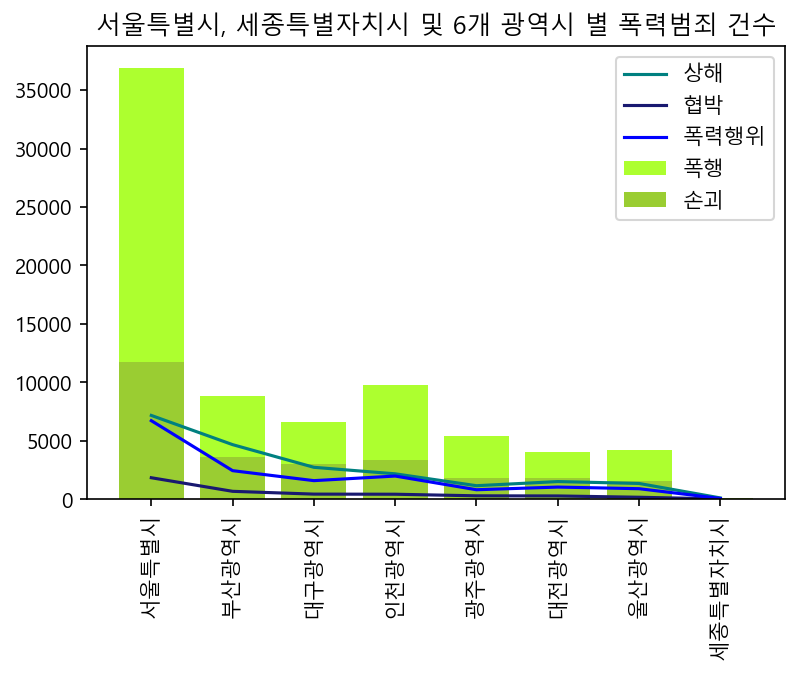

In [25]:
#서울특별시, 세종특별자치시 및 6개 광역시 별 폭력범죄 건수
plt.rc('font', family='Malgun Gothic')

plt.figure(dpi = 150)
plt.title('서울특별시, 세종특별자치시 및 6개 광역시 별 폭력범죄 건수')
plt.plot(wide['지역'], wide['상해'], color = 'teal', label = '상해')
plt.plot(wide['지역'], wide['협박'], color = 'midnightblue', label = '협박')
plt.bar(wide['지역'], wide['폭행'], color = 'greenyellow', label = '폭행')
plt.bar(wide['지역'], wide['손괴'], color = 'yellowgreen', label = '손괴')
plt.plot(wide['지역'], wide['폭력행위'], color = 'b', label = '폭력행위')
plt.xticks(rotation=90)
plt.legend()
plt.show()